## Import Statements

In [1]:
# General
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

# Paths and Files
from pathlib import Path
import os

# Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# Model development and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
import hvplot.pandas
import seaborn as sns

# Quality of life improvements
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to improve readability

2024-01-18 20:16:52.827225: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

## Loading the Data

In [2]:
# 10-year Treasury Bonds

# Initialize an empty dataframe
ten_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Data_Files/10_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    ten_year_treasury_bond_df = pd.concat(
        [
            ten_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
ten_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
ten_year_treasury_bond_df.index = pd.to_datetime(ten_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
ten_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

ten_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1980-01-02,10.482,10.482,10.482,10.482,1.67%
1980-01-03,10.584,10.584,10.584,10.584,0.97%
1980-01-04,10.636,10.636,10.636,10.636,0.49%
1980-01-07,10.610,10.610,10.610,10.610,-0.24%
1980-01-08,10.553,10.553,10.553,10.553,-0.54%


In [3]:
# 2-year Treasury Bonds

# Initialize an empty dataframe
two_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Data_Files/2_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    two_year_treasury_bond_df = pd.concat(
        [
            two_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
two_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
two_year_treasury_bond_df.index = pd.to_datetime(two_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
two_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

two_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1988-02-26,7.159,7.159,7.159,7.159,-0.47%
1988-02-29,7.125,7.125,7.125,7.125,-0.47%
1988-03-01,7.108,7.108,7.108,7.108,-0.24%
1988-03-02,7.090,7.090,7.090,7.090,-0.25%
1988-03-03,7.090,7.090,7.090,7.090,0.00%


In [4]:
# 3-month Treasury Bonds

# Initialize an empty dataframe
three_month_treasury_bond_df = pd.DataFrame(columns=["DATE","DTB3"])

# Set the folder path
folder_path = Path("./Data_Files/3_month_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    three_month_treasury_bond_df = pd.concat(
        [
            three_month_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
three_month_treasury_bond_df.set_index('DATE', inplace=True)

# Format the index as a datetime
three_month_treasury_bond_df.index = pd.to_datetime(three_month_treasury_bond_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
three_month_treasury_bond_df.sort_values(by=['DATE'], inplace=True)


three_month_treasury_bond_df.head()

,DTB3
DATE,
1954-01-04,1.330
1954-01-05,1.280
1954-01-06,1.280
1954-01-07,1.310
1954-01-08,1.310


In [5]:
# S&P Prices (OLD)

# Initialize an empty dataframe
sp500_old_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Vol.","Change %"])

# Set the folder path
folder_path = Path("./Data_Files/sp500_old")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_old_df = pd.concat(
        [
            sp500_old_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_old_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_old_df.index = pd.to_datetime(sp500_old_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
sp500_old_df.sort_values(by=['Date'], inplace=True)

sp500_old_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1979-12-26,107.8,107.8,108.4,107.1,NaN,0.09%
1979-12-27,108.0,108.0,108.5,107.1,NaN,0.19%
1979-12-28,107.8,107.8,108.6,107.2,NaN,-0.19%
1979-12-31,107.9,107.9,108.5,107.3,NaN,0.09%
1980-01-01,107.9,107.9,107.9,107.9,NaN,0.00%


In [6]:
# S&P Prices

# Initialize an empty dataframe
sp500_df = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

# Set the folder path
folder_path = Path("./Data_Files/sp500")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_df = pd.concat(
        [
            sp500_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_df.index = pd.to_datetime(sp500_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
sp500_df.sort_values(by=['Date'], inplace=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


In [7]:
# T-Bill Summary

# Initialize an empty dataframe
tbill_summary_df = pd.DataFrame(columns=["date","US1M","US3M","US6M","US1Y","US2Y","US3Y","US5Y","US7Y","US10Y","US20Y","US30Y"])

# Set the folder path
folder_path = Path("./Data_Files/summary_spreadsheet")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    tbill_summary_df = pd.concat(
        [
            tbill_summary_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
tbill_summary_df.set_index('date', inplace=True)

# Format the index as a datetime
tbill_summary_df.index = pd.to_datetime(tbill_summary_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
tbill_summary_df.sort_values(by=['date'], inplace=True)

tbill_summary_df.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [8]:
tbill_summary_df = pd.concat([tbill_summary_df, three_month_treasury_bond_df], axis=1)
tbill_summary_df

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y,DTB3
1954-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330
1954-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310
1954-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
2024-01-02,5.55,5.46,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08,5.22
2024-01-03,5.54,5.48,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05,5.24
2024-01-04,5.56,5.48,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13,5.24


## Helper Functions

### Confusion Matrix Plot Function

In [9]:
def plot_confusion_matrix(
    cm, # confusion_matrix from sklearn.metrics
    classes, # formatted as a list, e.g. ['sell','buy']
    title=None, # Title of the plot
    normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='confusion_matrix', # Filename in the savefig string
    cmap='gray_r', # Inverse grayscale
    linecolor='k', # Set the line color to black
    labelplot=False # Label the plot with TP, FP, FN, and TN
    ):

    # If the labelplot is turned on, then treat the composite text as a string
    if labelplot:
        fmt = 's'
    else:
        # If labelplot is turned off, but the confusion_matrix is normalized, then format the string as having 3 integers to the right of the decimal
        if normalize:
            fmt = '.3f'
        # If labelplot is turned off and the confusion matrix is not normalized, then format the string as a decimal integer
        else:
            fmt = 'd'

    # The confusion_matrix text, as oriented in sklearn.metrics.confusion_matrix
    cm_text = np.array([['(TN)','(FP)'],['(FN)','(TP)']])

    # Create the annotation text for Seaborn
    # If labelplot is true, add the "TN, FP, FN, and TP" text to the confusion matrix values
    if labelplot:
        # If the confusion matrix is normalized, format the data as a string having 3 integers to the right of the decimal
        if normalize:
            annot_text = (
                np.asarray(
                    [
                        "{0:.3f}\n{1}".format(data, text) for data, text in zip(cm.flatten(), cm_text.flatten())
                    ]
                )
        ).reshape(2, 2)
        # If the confusion matrix is not normalized, format the string as a decimal integer
        else:
            annot_text = (
                np.asarray(
                    [
                        "{0:d}\n{1}".format(data, text) for data, text in zip(cm.flatten(), cm_text.flatten())
                    ]
                )
            ).reshape(2, 2)
    # If labelplot is false, then only print the confusion matrix values
    else:
        annot_text = True
    
    # Create a figure instance and set the figure size in inches
    # The figure size includes the title and labels
    fig, ax = plt.subplots(figsize=(3,3))

    # Plot the confusion_matrix using the heatmap function
    sns.heatmap(
        cm, 
        fmt=fmt, 
        annot=annot_text, 
        square=True,
        xticklabels=classes,
        yticklabels=classes,
        cmap=cmap,
        vmin=0,
        vmax=0,
        linewidths=0.5,
        linecolor=linecolor,
        cbar=False
    )

    # Return the outer borders using despine
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title(title) # Set the plot title
    plt.ylabel('Actual outcome') # Set the y-axis label
    plt.xlabel('Predicted outcome') # Set the x-axis label
    plt.tight_layout() # Remove whitespace around the plot
    plt.savefig(Path(f"./Reports/{filename}_confusion_matrix.png")) # Save the figure
    plt.show()

### Cumulative Returns Plotting Function

In [10]:
def cumulative_returns_plot(
    predictions_df_arg # Dataframe with only daily return values
    , filename=None # Filename for saving the plot
    , title_text="Cumulative Returns:" # Variable and default value for the plot title
):

    # Initialize the figure, including the size
    fig = (1 + predictions_df_arg).cumprod().plot(
        figsize=(14,8)
    )
    
    # Add a title to the plot
    plt.title(f"{title_text}") 
    
    # Create a variable that refers to the axis
    ax = plt.gca()
    
    # Set the x- and y-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent')
    
    # Format the y-axis as a percentage
    # The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Rescale the axis boundaries
    # ax.axis([
    #     min(signals_df.index) - (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Minimum value on the x-axis
    #     max(signals_df.index) + (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Maximum value on the x-axis
    #     0,
    #     1.4
    # ])
    
    # Add a horizontal line to improve readability
    # ax.axhline(y=1, color='k', linestyle="--", alpha=0.2)
    
    # Create a light grid to improve readability
    ax.grid(which='major', color='k', linestyle='--', alpha=0.2)
    
    # Set the legend paramters
    plt.legend(
        framealpha=1.0, # Make the legend opaque
        edgecolor='k' # Set the edge color to black
    )

    # Reduce the whitespace around the plot
    plt.tight_layout()
    
    # If there's a filename, save the figure as a PNG
    if filename:
        relative_file_path = "./Plots/" + str(filename) + ".png"
        plt.savefig(Path(relative_file_path))
    
    return plt.show()

### Reviewing the Dataframe:

In [11]:
# Review the S&P 500 data
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


## Creating a reference dataframe for standardization:

In [12]:
# # Create a reference dataframe

# Move the Adjusted Close data to the new dataframe
# sp500_reference_dataframe = sp500_df[['Adj Close']].copy()
sp500_reference_dataframe = sp500_df[['Adj Close']].loc["1962-01-02":"2024-01-08"].copy()
# sp500_reference_dataframe = sp500_df[['Adj Close']].loc["2022-01-01":"2022-06-01"].copy()

# Create a Daily Returns column from the Close data
sp500_reference_dataframe['Daily Returns'] = sp500_reference_dataframe['Adj Close'].pct_change()

## Setting the Signals

### Manual Signals

In [13]:
# Make a copy of the S&P Close dataframe
manual_signals_df = sp500_df[['Adj Close']].copy()

manual_signals_df['Manual Signal'] = 0.0
manual_signals_df.loc["1962-01-02":"1968-11-28", 'Manual Signal'] = 1.0
manual_signals_df.loc["1970-05-26":"1973-01-10", 'Manual Signal'] = 1.0
manual_signals_df.loc["1974-10-03":"1976-12-30", 'Manual Signal'] = 1.0
manual_signals_df.loc["1982-08-12":"1987-08-24", 'Manual Signal'] = 1.0
manual_signals_df.loc["1987-12-04":"1990-07-15", 'Manual Signal'] = 1.0
manual_signals_df.loc["1990-10-11":"2000-03-22", 'Manual Signal'] = 1.0
manual_signals_df.loc["2002-10-09":"2007-10-08", 'Manual Signal'] = 1.0
manual_signals_df.loc["2009-03-09":"2010-04-22", 'Manual Signal'] = 1.0
manual_signals_df.loc["2010-07-02":"2011-04-28", 'Manual Signal'] = 1.0
manual_signals_df.loc["2011-10-03":"2018-09-19", 'Manual Signal'] = 1.0
manual_signals_df.loc["2018-12-24":"2020-02-18", 'Manual Signal'] = 1.0
manual_signals_df.loc["2020-03-23":"2022-01-03", 'Manual Signal'] = 1.0
manual_signals_df.loc["2022-10-12":"2024-01-08", 'Manual Signal'] = 1.0

manual_signals_df = manual_signals_df.dropna()

manual_signals_df.head()

,Adj Close,Manual Signal
Date,,
1962-01-02,70.959999,1.0
1962-01-03,71.129997,1.0
1962-01-04,70.639999,1.0
1962-01-05,69.660004,1.0
1962-01-08,69.120003,1.0


### Michael's Signal Generator

In [14]:
# Assuming you have a dataframe with a column 'Close' representing the closing prices
# and a column 'Signal' that you want to generate

def generate_signals(manual_signals_df, threshold_percentage=15):
    manual_signals_df['Signal'] = 1.0  # Initialize all signals to 1.0

    for i in range(1, len(manual_signals_df)):
        # Calculate cumulative percentage drop
        cumulative_drop = (manual_signals_df['Adj Close'][i] - manual_signals_df['Adj Close'][i:]) / manual_signals_df['Adj Close'][i]

        if (cumulative_drop > threshold_percentage / 100).any():
            lowest_after_drop = manual_signals_df['Adj Close'][i:].idxmin()
            highest_before_drop = manual_signals_df['Adj Close'].loc[manual_signals_df.index[i]:lowest_after_drop].idxmax()

            # Use .loc for inclusive slicing
            manual_signals_df.loc[highest_before_drop:lowest_after_drop, 'Signal'] = 0.0

            # Prevent redundant signal assignments
            manual_signals_df.loc[lowest_after_drop:, 'Signal'] = 1.0  # Set signals back to 1.0 from the lowest day onward

    return manual_signals_df



manual_signals_df = generate_signals(manual_signals_df, threshold_percentage=15)

manual_signals_df

,Adj Close,Manual Signal,Signal
Date,,,
1962-01-02,70.959999,1.0,1.0
1962-01-03,71.129997,1.0,0.0
1962-01-04,70.639999,1.0,0.0
1962-01-05,69.660004,1.0,0.0
1962-01-08,69.120003,1.0,0.0
...,...,...,...
2023-12-29,4769.830078,1.0,1.0
2024-01-02,4742.830078,1.0,1.0
2024-01-03,4704.810059,1.0,1.0


<Axes: xlabel='Date'>

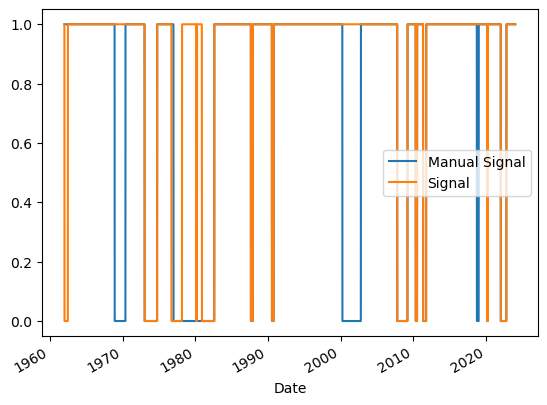

In [15]:
manual_signals_df.plot(y=['Manual Signal', 'Signal'])

<Axes: xlabel='Date'>

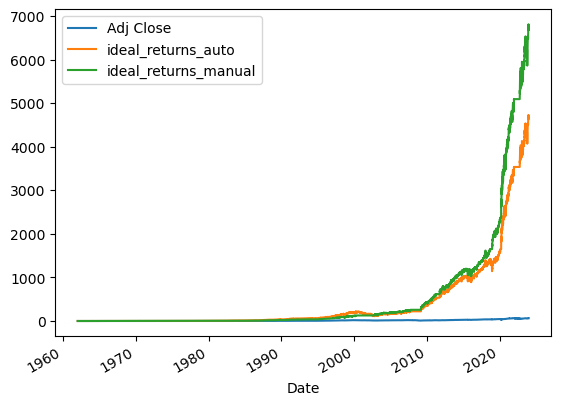

In [16]:
com_results_df = pd.DataFrame(manual_signals_df['Adj Close'].pct_change())

com_results_df['ideal_returns_auto'] = manual_signals_df['Adj Close'].pct_change() * manual_signals_df['Signal'].shift()

com_results_df['ideal_returns_manual'] = manual_signals_df['Adj Close'].pct_change() * manual_signals_df['Manual Signal'].shift()

(1+com_results_df).cumprod().plot()

### Trading Signals: SMA Window Comparison

These signals are made by comparing the short SMA rolling window to the long SMA rolling window (past X and Y days, respectively).  When the short SMA rolling window is higher than the long SMA rolling window, the signal is to buy.  Otherwise, set the signal to sell.

In [17]:
# # Trading Signals: SMA Window Comparison

# Create the dataframe
sma_window_comparison_df = sp500_reference_dataframe.copy()

# Set the short and long SMA windows (in days)
sma_short_window = 4
sma_long_window = 15

# Create columns for the Rolling Window values
sma_window_comparison_df['Short SMA'] = sma_window_comparison_df['Adj Close'].rolling(window=sma_short_window).mean()
sma_window_comparison_df['Long SMA'] = sma_window_comparison_df['Adj Close'].rolling(window=sma_long_window).mean()

# Create a trading signal based on the SMAs
sma_window_comparison_df['SMA Signal'] = np.where(sma_window_comparison_df['Short SMA'] >= sma_window_comparison_df['Long SMA'], 1.0, 0.0)

# Create a SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_window_comparison_df['SMA Signal Daily Returns'] = sma_window_comparison_df['Daily Returns'] * sma_window_comparison_df['SMA Signal'].shift()

In [18]:
# # Clean up the Dataframe and review it

# Drop the rows with NAs
sma_window_comparison_df = sma_window_comparison_df.dropna()

# Review the Dataframe
sma_window_comparison_df.head()

,Adj Close,Daily Returns,Short SMA,Long SMA,SMA Signal,SMA Signal Daily Returns
Date,,,,,,
1962-01-22,68.809998,0.000873,68.567499,69.427334,0.0,0.0
1962-01-23,68.290001,-0.007557,68.560000,69.249334,0.0,-0.0
1962-01-24,68.400002,0.001611,68.562500,69.067334,0.0,0.0
1962-01-25,68.349998,-0.000731,68.462500,68.914667,0.0,-0.0
1962-01-26,68.129997,-0.003219,68.292499,68.812667,0.0,-0.0


### Trading Signals: SMA Inertia

These signals are made using a short SMA rolling window (past X days).  When the window is positive, the signal is to buy.  When the window is negative, the signal is to sell.

In [19]:
# # SMA Inertia Signals

# Create the dataframe
sma_inertia_df = sp500_reference_dataframe.copy()

# Set the inertia SMA window (in days)
sma_inertia_window = 4

# Create columns for the Rolling Window value
sma_inertia_df['Inertia SMA'] = sma_inertia_df['Adj Close'].rolling(window=sma_inertia_window).mean()

# Create a Daily Returns column
sma_inertia_df['Inertia SMA Daily Returns'] = sma_inertia_df['Inertia SMA'].pct_change()

# Create a trading signal based on the inertial SMA
sma_inertia_df['Inertia SMA Signal'] = np.where(sma_inertia_df['Inertia SMA Daily Returns'] >= 0, 1.0, 0.0)

# Create an Inertia SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_inertia_df['Inertia SMA Signal Daily Returns'] = sma_inertia_df['Daily Returns'] * sma_inertia_df['Inertia SMA Signal'].shift()

In [20]:
# # Clean up the Dataframe and review it

# Drop the rows with NAs
sma_inertia_df = sma_inertia_df.dropna()

# Review the Dataframe
sma_inertia_df.head()

,Adj Close,Daily Returns,Inertia SMA,Inertia SMA Daily Returns,Inertia SMA Signal,Inertia SMA Signal Daily Returns
Date,,,,,,
1962-01-08,69.120003,-0.007752,70.137501,-0.006516,0.0,-0.0
1962-01-09,69.150002,0.000434,69.642502,-0.007058,0.0,0.0
1962-01-10,68.959999,-0.002748,69.222502,-0.006031,0.0,-0.0
1962-01-11,69.370003,0.005946,69.150002,-0.001047,0.0,0.0
1962-01-12,69.610001,0.003460,69.272501,0.001772,1.0,0.0


### Trading Signals: Balanced Inertia, including future information

These signals are set using forward-looking information about market performance, so they're near perfect.  The signals are generated using a 31-day long rolling window centered on the date in question.  When the SMA rolling window is positive, set the signal to buy.  When it's negative, set the symbol to sell.

In [21]:
# # SMA Balanced Inertia Signals

# Create the dataframe
sma_balanced_inertia_df = sp500_reference_dataframe.copy()

# Set the inertia SMA window (in days)
# Note this value must be odd
sma_balanced_inertia_window = 31

# If necessary, force the value to be odd
if sma_balanced_inertia_window % 2 == 0:
    sma_balanced_inertia_window += 1

# Create columns for the Rolling Window value
sma_balanced_inertia_df['Balanced Inertia SMA'] = sma_balanced_inertia_df['Adj Close'].rolling(window=sma_inertia_window, center=True).mean()

# Create a Daily Returns column
sma_balanced_inertia_df['Balanced Inertia SMA Daily Returns'] = sma_balanced_inertia_df['Balanced Inertia SMA'].pct_change()

# Create a trading signal based on the balanced inertial SMA
sma_balanced_inertia_df['Balanced Inertia SMA Signal'] = np.where(sma_balanced_inertia_df['Balanced Inertia SMA Daily Returns'] >= 0, 1.0, 0.0)

# Create a Balanced Inertia SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_balanced_inertia_df['Balanced Inertia SMA Signal Daily Returns'] = sma_balanced_inertia_df['Daily Returns'] * sma_balanced_inertia_df['Balanced Inertia SMA Signal'].shift()

In [22]:
sma_balanced_inertia_df.head()

,Adj Close,Daily Returns,Balanced Inertia SMA,Balanced Inertia SMA Daily Returns,Balanced Inertia SMA Signal,Balanced Inertia SMA Signal Daily Returns
Date,,,,,,
1962-01-02,70.959999,NaN,NaN,NaN,0.0,NaN
1962-01-03,71.129997,0.002396,NaN,NaN,0.0,0.0
1962-01-04,70.639999,-0.006889,70.597500,NaN,0.0,-0.0
1962-01-05,69.660004,-0.013873,70.137501,-0.006516,0.0,-0.0
1962-01-08,69.120003,-0.007752,69.642502,-0.007058,0.0,-0.0


## Making a Composite Dataframe for the Various Signals and their Financial Performance

### Composite Value of the S&P 500

In [23]:
# Composite Value

# Create the dataframe
composite_value_df = sp500_reference_dataframe[['Adj Close']].copy()

# Add the SMA Comparison values
composite_value_df['Short SMA'] = sma_window_comparison_df['Short SMA']
composite_value_df['Long SMA'] = sma_window_comparison_df['Long SMA']

# Add the Inertia SMA values
composite_value_df['Inertia SMA'] = sma_inertia_df['Inertia SMA']

# Add the Balanced Inertia SMA values
composite_value_df['Balanced Inertia SMA'] = sma_balanced_inertia_df['Balanced Inertia SMA']

In [24]:
composite_value_df = composite_value_df.dropna()

composite_value_df.head()

,Adj Close,Short SMA,Long SMA,Inertia SMA,Balanced Inertia SMA
Date,,,,,
1962-01-22,68.809998,68.567499,69.427334,68.567499,68.560000
1962-01-23,68.290001,68.560000,69.249334,68.560000,68.562500
1962-01-24,68.400002,68.562500,69.067334,68.562500,68.462500
1962-01-25,68.349998,68.462500,68.914667,68.462500,68.292499
1962-01-26,68.129997,68.292499,68.812667,68.292499,68.195000


<Axes: xlabel='Date'>

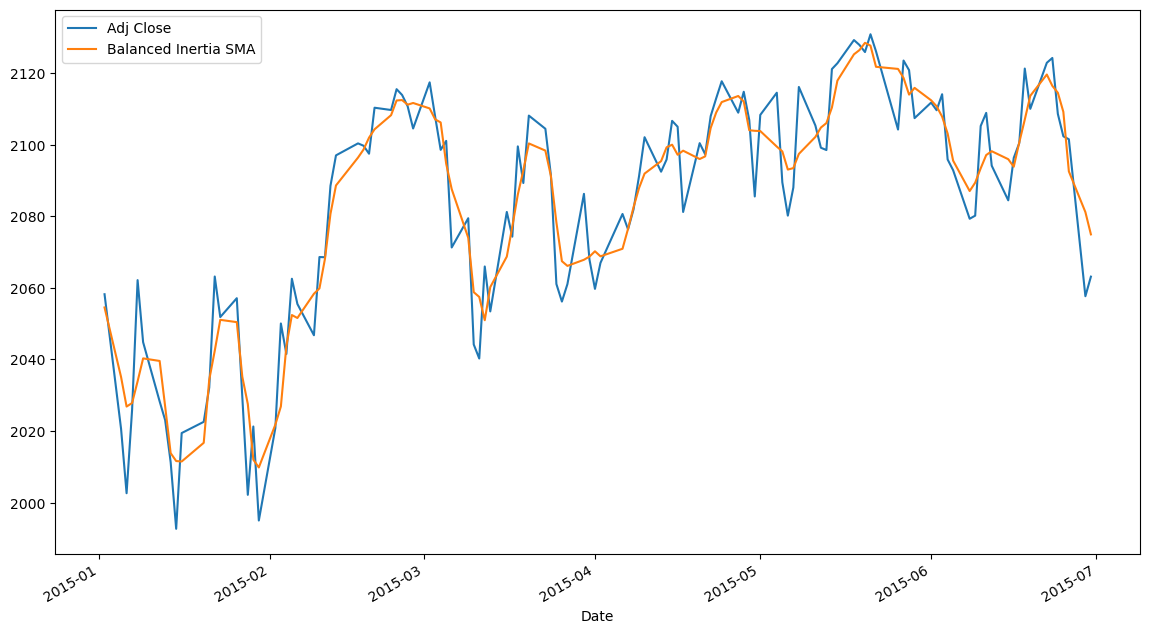

In [25]:
composite_value_df[[
    'Adj Close'
    # , 'Short SMA'
    # , 'Long SMA'
    # , 'Inertia SMA'
    , 'Balanced Inertia SMA'
]].loc['2015-01-01':'2015-06-30'].plot(
    figsize=(14,8),
    # marker="o"
)

### Composite Daily Returns for the S&P and Each Set of Signals

In [26]:
# Composite Daily Returns

# Create the dataframe
composite_daily_returns_df = sp500_reference_dataframe[['Daily Returns']].copy()

# Add the SMA Comparison values
composite_daily_returns_df['SMA Signal Daily Returns'] = sma_window_comparison_df['SMA Signal Daily Returns']

# Add the Inertia SMA values
composite_daily_returns_df['Inertia SMA Signal Daily Returns'] = sma_inertia_df['Inertia SMA Signal Daily Returns']

# Add the Balanced Inertia SMA values
composite_daily_returns_df['Balanced Inertia SMA Signal Daily Returns'] = sma_balanced_inertia_df['Balanced Inertia SMA Signal Daily Returns']

# Add the Signal Generator values
composite_daily_returns_df['Signal Generator Daily Returns'] = com_results_df['ideal_returns_auto']

# Add the Manual Signal values
composite_daily_returns_df['Manual Signal Daily Returns'] = com_results_df['ideal_returns_manual']

In [27]:
composite_daily_returns_df = composite_daily_returns_df.dropna()

composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,Signal Generator Daily Returns,Manual Signal Daily Returns
Date,,,,,,
1962-01-22,0.000873,0.0,0.000000,0.000000,0.0,0.000873
1962-01-23,-0.007557,-0.0,-0.000000,-0.000000,-0.0,-0.007557
1962-01-24,0.001611,0.0,0.000000,0.001611,0.0,0.001611
1962-01-25,-0.000731,-0.0,-0.000731,-0.000000,-0.0,-0.000731
1962-01-26,-0.003219,-0.0,-0.000000,-0.000000,-0.0,-0.003219


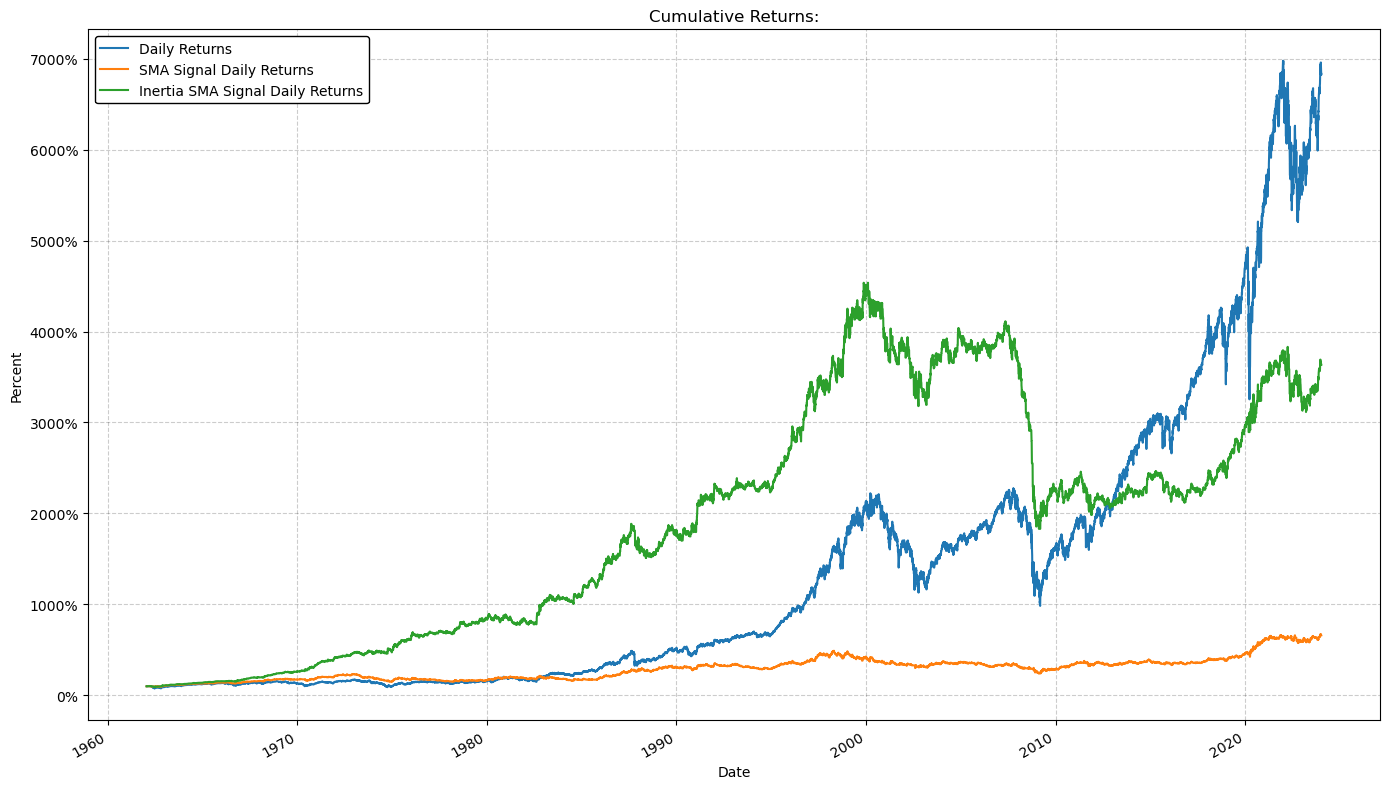

In [28]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        , 'SMA Signal Daily Returns'
        , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
    ]]
    # , filename="temp_plot"
    # , title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

### Composite Signals

In [29]:
# Composite Signals DF

# Create the dataframe
trading_signals_df = sp500_reference_dataframe.copy()

# Add the Manual Signal values
trading_signals_df['Auto Signal'] = manual_signals_df['Signal']

# Add the Manual Signal values
trading_signals_df['Manual Signal'] = manual_signals_df['Manual Signal']

# Add the SMA Comparison values
trading_signals_df['SMA Signal'] = sma_window_comparison_df['SMA Signal']

# Add the Inertia SMA values
trading_signals_df['Inertia SMA Signal'] = sma_inertia_df['Inertia SMA Signal']

# Add the Balanced Inertia SMA values
trading_signals_df['Balanced Inertia SMA Signal'] = sma_balanced_inertia_df['Balanced Inertia SMA Signal']

In [30]:
trading_signals_df = trading_signals_df.dropna()

trading_signals_df.head()

,Adj Close,Daily Returns,Auto Signal,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal
Date,,,,,,,
1962-01-22,68.809998,0.000873,0.0,1.0,0.0,0.0,0.0
1962-01-23,68.290001,-0.007557,0.0,1.0,0.0,0.0,1.0
1962-01-24,68.400002,0.001611,0.0,1.0,0.0,1.0,0.0
1962-01-25,68.349998,-0.000731,0.0,1.0,0.0,0.0,0.0
1962-01-26,68.129997,-0.003219,0.0,1.0,0.0,0.0,0.0


## Financal Return Plot Using Just the Signals

The plot represents the hypothetical returns if the signals could be perfectly implemented.

In [31]:
composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,Signal Generator Daily Returns,Manual Signal Daily Returns
Date,,,,,,
1962-01-22,0.000873,0.0,0.000000,0.000000,0.0,0.000873
1962-01-23,-0.007557,-0.0,-0.000000,-0.000000,-0.0,-0.007557
1962-01-24,0.001611,0.0,0.000000,0.001611,0.0,0.001611
1962-01-25,-0.000731,-0.0,-0.000731,-0.000000,-0.0,-0.000731
1962-01-26,-0.003219,-0.0,-0.000000,-0.000000,-0.0,-0.003219


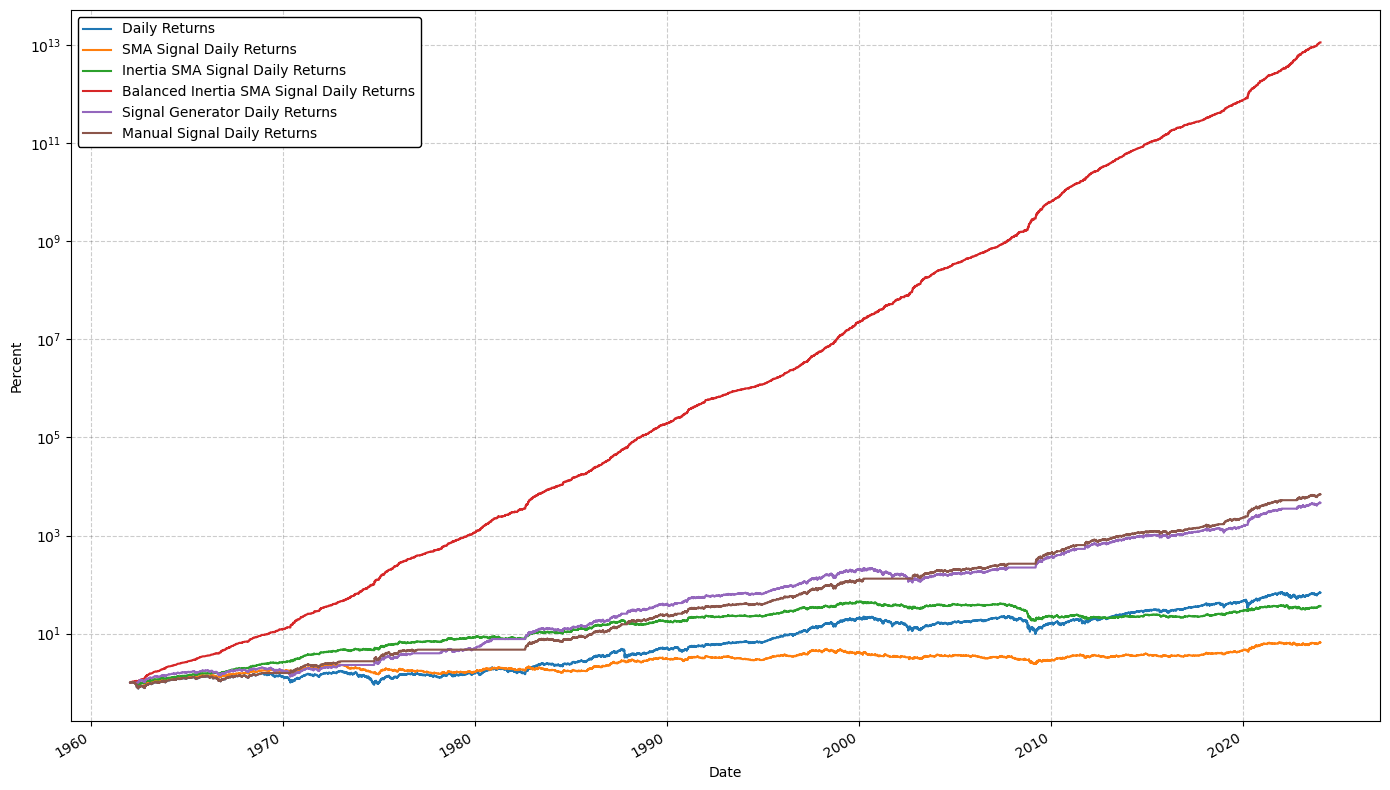

In [32]:
# Initialize the figure, including the size
fig = (1 + composite_daily_returns_df[[
    "Daily Returns"
    , "SMA Signal Daily Returns"
    , "Inertia SMA Signal Daily Returns"
    , "Balanced Inertia SMA Signal Daily Returns"
    , "Signal Generator Daily Returns"
    , "Manual Signal Daily Returns"
]]).cumprod().plot(
    figsize=(14,8)
)

# Add a title to the plot
# plt.title(f"{title_text}") 

# Create a variable that refers to the axis
ax = plt.gca()

# Set the x- and y-axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Percent')

# Format the y-axis as a percentage
# The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Rescale the axis boundaries
# ax.axis([
#     min(signals_df.index) - (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Minimum value on the x-axis
#     max(signals_df.index) + (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Maximum value on the x-axis
#     0,
#     1.4
# ])

# Add a horizontal line to improve readability
# ax.axhline(y=1, color='k', linestyle="--", alpha=0.2)

# Create a light grid to improve readability
ax.grid(which='major', color='k', linestyle='--', alpha=0.2)

plt.yscale('log')

# Set the legend paramters
plt.legend(
    framealpha=1.0, # Make the legend opaque
    edgecolor='k' # Set the edge color to black
)

# Reduce the whitespace around the plot
plt.tight_layout()

# If there's a filename, save the figure as a PNG
# if filename:
# relative_file_path = "./Plots/" + str(filename) + ".png"
plt.savefig(Path("./Plots/signals_plot.png"))
    
plt.show()

## Data Preparation for Predictive Modeling

### Creating a Feature Dataset

Note that the target column is also included in the dataset.

Handling NA() values in the rolling window:
- https://stackoverflow.com/questions/71788354/pandas-rolling-mean-and-ignore-nan

In [33]:
# Create the dataframe
# features_and_target_df = trading_signals_df[['Balanced Inertia SMA Signal']].copy()
features_and_target_df = trading_signals_df[['Manual Signal']].copy()

# features_and_target_df = features_and_target_df.rename(columns={'Balanced Inertia SMA Signal':'Signal'})
features_and_target_df = features_and_target_df.rename(columns={'Manual Signal':'Signal'})

#### 4 Basic Features for 4 different securities (16 total features):

For the S&P 500, 3-month Treasury Bond, 2-year Treasury Bond, and 10-year Treasury Bond:
- Percent change since the day before
- Percent change in the short SMA window (past X days)
- Percent change in the mid SMA window (past Y days)
- Percent change in the long SMA window (past Z days)

In [34]:
# # Add features to the dataframe

sma_short_window_var = 4
sma_mid_window_var = 10
sma_long_window_var = 15

tbill_summary_df['DTB3'] = pd.to_numeric(tbill_summary_df['DTB3'], errors='coerce')
# # S&P attributes

# Percent change from the day before
features_and_target_df['SP500_pct_change'] = sp500_reference_dataframe['Daily Returns']

# Percent change in the SMA short window since yesterday
features_and_target_df['SP500_SMA_short_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_short_window_var).mean().pct_change()

# Percent change in the SMA mid window since yesterday
features_and_target_df['SP500_SMA_mid_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_mid_window_var).mean().pct_change()

# Percent change in the SMA long window since yesterday
features_and_target_df['SP500_SMA_long_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_long_window_var).mean().pct_change()


# # # Treasury Bill Attributes: Note that all of the Treasury Bill values are already percents

# # 3 Month Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US3M_pct_change'] = tbill_summary_df[['DTB3']].dropna() - tbill_summary_df[['DTB3']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US3M_SMA_short_pct_change'] = tbill_summary_df[['DTB3']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US3M_SMA_mid_pct_change'] = tbill_summary_df[['DTB3']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US3M_SMA_long_pct_change'] = tbill_summary_df[['DTB3']].dropna().rolling(window=sma_long_window_var).mean()

# # 2 Year Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US1Y_pct_change'] = tbill_summary_df[['US1Y']].dropna() - tbill_summary_df[['US1Y']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US1Y_SMA_short_pct_change'] = tbill_summary_df[['US1Y']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US1Y_SMA_mid_pct_change'] = tbill_summary_df[['US1Y']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US1Y_SMA_long_pct_change'] = tbill_summary_df[['US1Y']].dropna().rolling(window=sma_long_window_var).mean()

# # 10 Year Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US10Y_pct_change'] = tbill_summary_df[['US10Y']].dropna() - tbill_summary_df[['US10Y']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US10Y_SMA_short_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US10Y_SMA_mid_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US10Y_SMA_long_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_long_window_var).mean()

In [35]:
# tbill_summary_df.head(1)

In [36]:
# sp500_reference_dataframe.head(1)

#### 5 More features:

Yield curves:
- Difference between the 10Y and 3M Treasury Bonds
- Difference between the 10Y and 2Y Treasury Bonds

Volatility:
- S&P 500 closing price divided by the S&P closing price in the short SMA rolling window (past X days)
- S&P 500 closing price divided by the S&P closing price in the mid SMA rolling window (past Y days)
- S&P 500 closing price divided by the S&P closing price in the short SMA rolling window (past Z days)

In [37]:
# # Michael's Features
# Yield Curves
features_and_target_df['Yield Curve 1'] = tbill_summary_df['US10Y'] - tbill_summary_df['DTB3']
features_and_target_df['Yield Curve 2'] = tbill_summary_df['US10Y'] - tbill_summary_df['US2Y']

# Volatility
features_and_target_df["Volatility_Short"] = sp500_reference_dataframe["Adj Close"] / ( sp500_reference_dataframe["Adj Close"].rolling(window=sma_short_window_var).mean() )
features_and_target_df["Volatility_Mid"] = sp500_reference_dataframe["Adj Close"] / ( sp500_reference_dataframe["Adj Close"].rolling(window=sma_mid_window_var).mean() )
features_and_target_df["Volatility_Long"] = sp500_reference_dataframe["Adj Close"] / ( sp500_reference_dataframe["Adj Close"].rolling(window=sma_long_window_var).mean() )

In [38]:
features_and_target_df = features_and_target_df.dropna()

features_and_target_df.head()

,Signal,SP500_pct_change,SP500_SMA_short_pct_change,SP500_SMA_mid_pct_change,SP500_SMA_long_pct_change,US3M_pct_change,US3M_SMA_short_pct_change,US3M_SMA_mid_pct_change,US3M_SMA_long_pct_change,US1Y_pct_change,...,US1Y_SMA_long_pct_change,US10Y_pct_change,US10Y_SMA_short_pct_change,US10Y_SMA_mid_pct_change,US10Y_SMA_long_pct_change,Yield Curve 1,Yield Curve 2,Volatility_Short,Volatility_Mid,Volatility_Long
Date,,,,,,,,,,,,,,,,,,,,,
1976-06-01,1.0,-0.003294,0.000904,-0.001234,-0.002142,0.06,5.4975,5.432,5.334667,-0.05,...,6.540667,-0.02,7.9600,7.959,7.949333,2.39,0.68,1.001630,0.995136,0.989469
1976-06-02,1.0,0.003706,0.002207,-0.001036,-0.001804,0.02,5.5250,5.461,5.367333,0.02,...,6.574000,0.00,7.9575,7.959,7.950667,2.37,0.71,1.003128,0.999860,0.994930
1976-06-03,1.0,-0.000898,0.001877,-0.001048,-0.001747,-0.05,5.5325,5.482,5.392667,0.01,...,6.602000,-0.02,7.9400,7.957,7.949333,2.40,0.70,1.000350,1.000010,0.995777
1976-06-04,1.0,-0.009787,-0.002573,-0.002846,-0.001996,-0.06,5.5250,5.489,5.416667,-0.13,...,6.621333,-0.03,7.9225,7.951,7.947333,2.43,0.77,0.993114,0.993049,0.988002
1976-06-07,1.0,-0.005245,-0.003055,-0.002634,-0.001800,-0.01,5.5000,5.490,5.436000,-0.09,...,6.627333,-0.01,7.9075,7.939,7.944000,2.43,0.79,0.990933,0.990450,0.984593


In [39]:
# tbill_summary_df[['US10Y']].loc['2021-01-15':'2021-02-25']

## Logistic Regression Model

In [40]:
# Split the data into training and testing sets based on dates
train_data = features_and_target_df.loc['1976-06-01':'2007-12-31']
test_data = features_and_target_df.loc["2008-01-01":"2024-01-08"]

In [41]:
# Check the class sizes of the signals
train_data['Signal'].value_counts()

Signal
1.0    5664
0.0    2220
Name: count, dtype: int64

In [42]:
# Create the training and testing dataframes
X_train = train_data.drop(columns=['Signal'])
y_train = train_data['Signal']

X_test = test_data.drop(columns=['Signal'])
y_test = test_data['Signal']

# Review the features dataframe
# X_train.head()
# y_train.head()
# X_test.head()
# y_test.head()

In [43]:
# Scale the features using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Create an instance of the LR model
logistic_regression = LogisticRegression()

# Fit the model
logistic_regression = logistic_regression.fit(X_train_scaled, y_train)

# Make predictions:
predicted_signals = logistic_regression.predict(X_test_scaled)

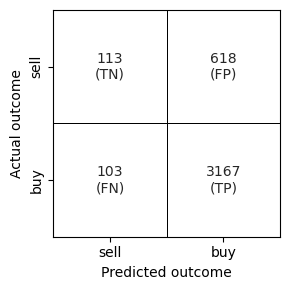

In [45]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, predicted_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='lr', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [46]:
# Make a classification report
print(classification_report(y_test, predicted_signals))

              precision    recall  f1-score   support

         0.0       0.52      0.15      0.24       731
         1.0       0.84      0.97      0.90      3270

    accuracy                           0.82      4001
   macro avg       0.68      0.56      0.57      4001
weighted avg       0.78      0.82      0.78      4001



In [47]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
lr_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
lr_signals_df['LR Model Signals'] = predicted_signals

# Review the copied dataframe
lr_signals_df.head()

,Signal,LR Model Signals
Date,,
2008-01-02,0.0,0.0
2008-01-03,0.0,0.0
2008-01-04,0.0,0.0
2008-01-07,0.0,0.0
2008-01-08,0.0,0.0


In [48]:
# Add the LR Model Returns to the composite_daily_returns_df
composite_daily_returns_df['LR Model Returns'] = composite_daily_returns_df['Daily Returns'] * lr_signals_df['LR Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,Signal Generator Daily Returns,Manual Signal Daily Returns,LR Model Returns
Date,,,,,,,
2008-01-03,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,-0.024552,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-07,0.003223,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,-0.018352,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-09,0.013624,0.0,0.0,0.0,0.0,0.0,0.0


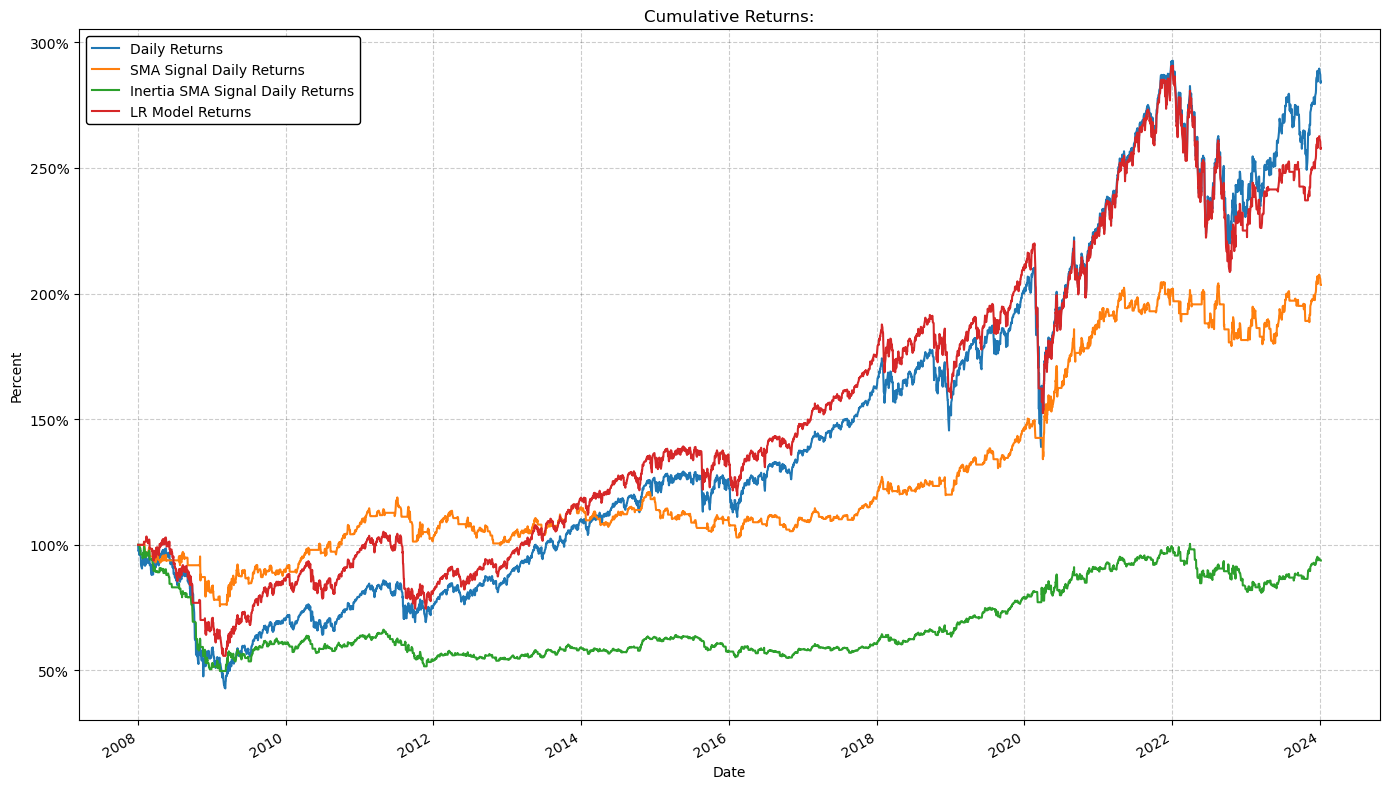

In [49]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        , 'SMA Signal Daily Returns'
        , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        , 'LR Model Returns'
    ]]
    # , filename="temp_plot"
    # , title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [50]:
# Append the signals to the trading_signals_df
trading_signals_df['LR Model Signals'] = lr_signals_df['LR Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Auto Signal,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals
Date,,,,,,,,
2008-01-02,1447.160034,-0.014438,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,1447.160034,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,1411.630005,-0.024552,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-07,1416.180054,0.003223,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,1390.189941,-0.018352,0.0,0.0,0.0,0.0,0.0,0.0


## Neural Network Model

Note that this intentionally uses the same training and test data sets as the logistic regression model above.

In [51]:
tf.keras.backend.clear_session()



# Define the the number of inputs (features) to the model
# The number of features in the dataset is the length of any row
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

21

In [52]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [53]:
# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

11

In [54]:
# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

6

In [55]:


# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
# Specify the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
# Specify the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                242       
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
#from keras.callbacks import EarlyStopping

# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



# Train the model and capture the training history
#history_nn = nn.fit(X_train_scaled, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot the training accuracy over epochs
#plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
#plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

In [58]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
247/247 [==============================] - 1s 1ms/step - loss: 0.5844 - accuracy: 0.7500
Epoch 2/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7938
Epoch 3/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7957
Epoch 4/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8007
Epoch 5/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8028
Epoch 6/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8053
Epoch 7/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8070
Epoch 8/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8092
Epoch 9/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8099
Epoch 10/20
247/247 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8120

In [59]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

126/126 - 0s - loss: 0.6349 - accuracy: 0.7026 - 258ms/epoch - 2ms/step
Loss: 0.6349429488182068, Accuracy: 0.7025743722915649


In [60]:
# Predict the signals
nn_predictions = nn.predict(X_test_scaled)

# Review the predictions
nn_predictions[:10]

126/126 [==============================] - 0s 979us/step


array([[0.18081819],
       [0.48820546],
       [0.21750818],
       [0.46926546],
       [0.20638826],
       [0.40417406],
       [0.24359868],
       [0.15917286],
       [0.4212783 ],
       [0.16267018]], dtype=float32)

In [61]:
# The signals must be a 0 or 1, but sigmoid outputs a continuous value
# Whenever the prediction is greater than or equal to 0.5, make the signal a 1
# Otherwise make the signal 0

# Initialize an empty array
nn_signals = []

# Assign the signals
for i in range(0,len(nn_predictions)):
    if nn_predictions[i] >= 0.5:
        nn_signals.append(1.0)
    else:
        nn_signals.append(0.0)

In [62]:
# Review the value counts for each signal
pd.DataFrame(nn_signals).value_counts()

1.0    3048
0.0     953
Name: count, dtype: int64

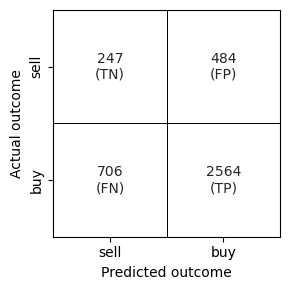

In [63]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, nn_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='nn', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [64]:
# Make a classification report
print(classification_report(y_test, nn_signals))

              precision    recall  f1-score   support

         0.0       0.26      0.34      0.29       731
         1.0       0.84      0.78      0.81      3270

    accuracy                           0.70      4001
   macro avg       0.55      0.56      0.55      4001
weighted avg       0.73      0.70      0.72      4001



In [65]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
nn_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
nn_signals_df['NN Model Signals'] = nn_signals

# Review the copied dataframe
nn_signals_df.head()

,Signal,NN Model Signals
Date,,
2008-01-02,0.0,0.0
2008-01-03,0.0,0.0
2008-01-04,0.0,0.0
2008-01-07,0.0,0.0
2008-01-08,0.0,0.0


In [66]:
# Add the NN Model Returns to the composite_daily_returns_df
composite_daily_returns_df['NN Model Returns'] = composite_daily_returns_df['Daily Returns'] * nn_signals_df['NN Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,Signal Generator Daily Returns,Manual Signal Daily Returns,LR Model Returns,NN Model Returns
Date,,,,,,,,
2008-01-03,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,-0.024552,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-07,0.003223,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,-0.018352,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-09,0.013624,0.0,0.0,0.0,0.0,0.0,0.0,0.0


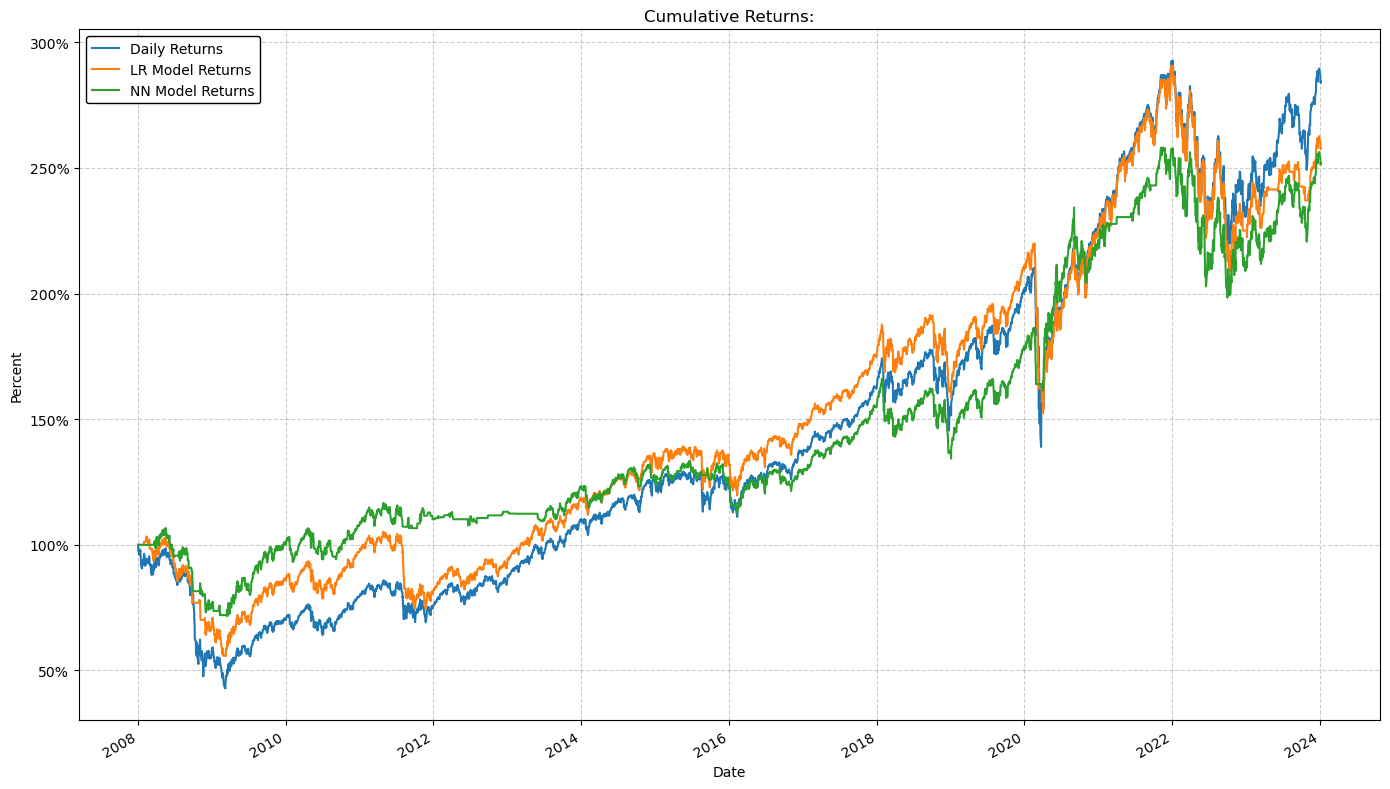

In [67]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        # , 'SMA Signal Daily Returns'
        # , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        , 'LR Model Returns'
        , 'NN Model Returns'
    ]]#.loc['2022-01-01':'2022-12-31']
    # , filename="temp_plot"
    # , title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [68]:
# Append the signals to the trading_signals_df
trading_signals_df['NN Model Signals'] = nn_signals_df['NN Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Auto Signal,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals,NN Model Signals
Date,,,,,,,,,
2008-01-02,1447.160034,-0.014438,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,1447.160034,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,1411.630005,-0.024552,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-07,1416.180054,0.003223,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,1390.189941,-0.018352,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Saving the NN Model Files

In [69]:
# # User inputs:
# Name the folder that will contain the saved model files 
folder_name = "NN_Model"

# Name the model
model_name = "nn_model"

In [70]:
# Make the folder if the folder doesn't already exist
# See here:
# https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories
Path(f"./Model_Results/{folder_name}").mkdir(parents=True, exist_ok=True)

In [71]:
# # JSON model files

# Set the file path for the json model files
file_path = Path(f"Model_Results/{folder_name}/{model_name}.json")

# Save model in JSON format
nn_json = nn.to_json()

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

In [72]:
# # h5 model files

# Set the file path for the h5 model files
file_path = Path(f"Model_Results/{folder_name}/{model_name}.h5")

# Save the weights to the file path
nn.save_weights(file_path)

## LSTM Neural Network

In [73]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [74]:
# X_train_reshaped[0]

In [75]:
# Define the the number of inputs (features) to the model
# The number of features in the dataset is the length of any row
number_input_features = len(X_train_reshaped[0][0])

# Review the number of features
number_input_features

21

In [76]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [77]:
# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

11

In [78]:
# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

6

In [79]:
# Create the Sequential model instance
lstm = Sequential()

# Add the first hidden layer
# Specify the number of inputs, the number of hidden nodes, and the activation function
lstm.add(LSTM(units=hidden_nodes_layer1, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))

# Add the second hidden layer
# Specify the number of hidden nodes and the activation function
lstm.add(LSTM(units=hidden_nodes_layer2, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
lstm.add(Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 11)             1452      
                                                                 
 lstm_1 (LSTM)               (None, 6)                 432       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1891 (7.39 KB)
Trainable params: 1891 (7.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# Compile the Sequential model
lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:

# Train the model and capture the training history
#history_lstm = lstm.fit(X_train_reshaped, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot the training accuracy over epochs
#plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
#plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

In [82]:
lstm.fit(X_train_reshaped, y_train, epochs=20
         #, batch_size=32, validation_split=0.2
        )

Epoch 1/20
247/247 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7576
Epoch 2/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8133
Epoch 3/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8186
Epoch 4/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8228
Epoch 5/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8251
Epoch 6/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8265
Epoch 7/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8295
Epoch 8/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8322
Epoch 9/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8389
Epoch 10/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8436

In [83]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = lstm.evaluate(X_test_reshaped,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

126/126 - 0s - loss: 0.9864 - accuracy: 0.8038 - 366ms/epoch - 3ms/step
Loss: 0.9863547682762146, Accuracy: 0.803799033164978


In [84]:
# Predict the signals
lstm_predictions = lstm.predict(X_test_reshaped)

# Review the predictions
lstm_predictions[:10]

126/126 [==============================] - 0s 1ms/step


array([[0.16831732],
       [0.4316787 ],
       [0.12203655],
       [0.168199  ],
       [0.1213617 ],
       [0.16780497],
       [0.18835063],
       [0.06182105],
       [0.2602633 ],
       [0.053968  ]], dtype=float32)

In [85]:
# The signals must be a 0 or 1, but sigmoid outputs a continuous value
# Whenever the prediction is greater than or equal to 0.5, make the signal a 1
# Otherwise make the signal 0

# Initialize an empty array
lstm_signals = []

# Assign the signals
for i in range(0,len(lstm_predictions)):
    if lstm_predictions[i] >= 0.5:
        lstm_signals.append(1.0)
    else:
        lstm_signals.append(0.0)

In [86]:
# Review the value counts for each signal
pd.DataFrame(lstm_signals).value_counts()

1.0    3595
0.0     406
Name: count, dtype: int64

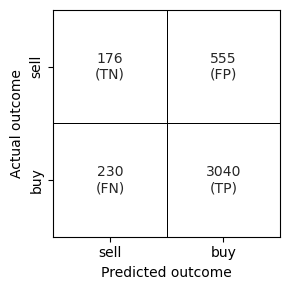

In [87]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, lstm_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='lstm', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [88]:
# Make a classification report
print(classification_report(y_test, lstm_signals))

              precision    recall  f1-score   support

         0.0       0.43      0.24      0.31       731
         1.0       0.85      0.93      0.89      3270

    accuracy                           0.80      4001
   macro avg       0.64      0.59      0.60      4001
weighted avg       0.77      0.80      0.78      4001



In [89]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
lstm_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
lstm_signals_df['LSTM Model Signals'] = lstm_signals

# Review the copied dataframe
lstm_signals_df.head()

,Signal,LSTM Model Signals
Date,,
2008-01-02,0.0,0.0
2008-01-03,0.0,0.0
2008-01-04,0.0,0.0
2008-01-07,0.0,0.0
2008-01-08,0.0,0.0


In [90]:
# Add the NN Model Returns to the composite_daily_returns_df
composite_daily_returns_df['LSTM Model Returns'] = composite_daily_returns_df['Daily Returns'] * lstm_signals_df['LSTM Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,Signal Generator Daily Returns,Manual Signal Daily Returns,LR Model Returns,NN Model Returns,LSTM Model Returns
Date,,,,,,,,,
2008-01-03,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,-0.024552,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-07,0.003223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,-0.018352,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2008-01-09,0.013624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


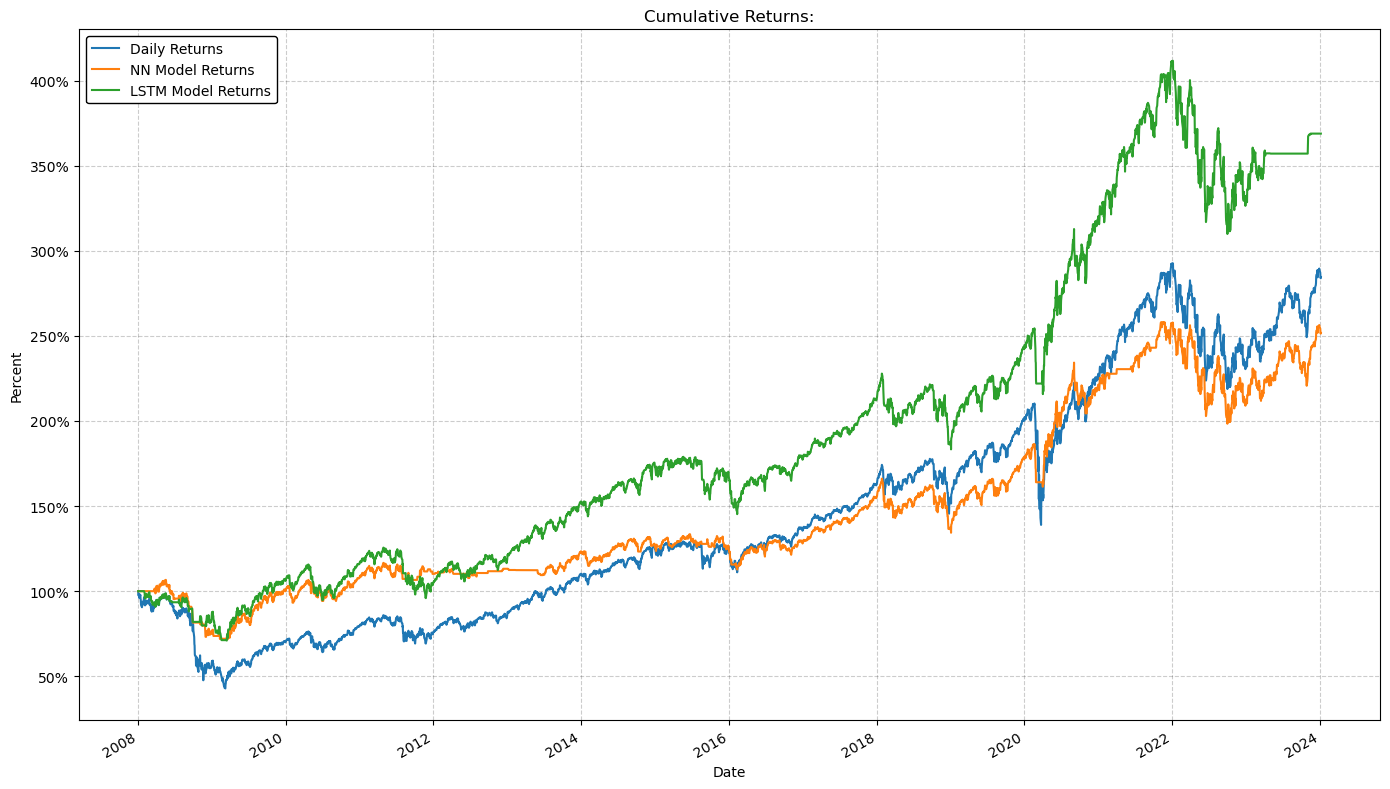

In [91]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        # , 'SMA Signal Daily Returns'
        # , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        # , 'LR Model Returns'
        , 'NN Model Returns'
        , 'LSTM Model Returns'
    ]]#.loc['2022-01-01':'2022-12-31']
    , filename="cumulative_returns_plot"
    # , title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [92]:
# Append the signals to the trading_signals_df
trading_signals_df['LSTM Model Signals'] = lstm_signals_df['LSTM Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Auto Signal,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals,NN Model Signals,LSTM Model Signals
Date,,,,,,,,,,
2008-01-02,1447.160034,-0.014438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,1447.160034,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-04,1411.630005,-0.024552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-07,1416.180054,0.003223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,1390.189941,-0.018352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Saving the LSTM Model Files

In [93]:
# # User inputs:
# Name the folder that will contain the saved model files 
folder_name = "LSTM_Model"

# Name the model
model_name = "lstm_model"

In [94]:
# Make the folder if the folder doesn't already exist
# See here:
# https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories
Path(f"./Model_Results/{folder_name}").mkdir(parents=True, exist_ok=True)

In [95]:
# # JSON model files

# Set the file path for the json model files
file_path = Path(f"Model_Results/{folder_name}/{model_name}.json")

# Save model in JSON format
lstm_json = lstm.to_json()

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(lstm_json)

In [96]:
# # h5 model files

# Set the file path for the h5 model files
file_path = Path(f"Model_Results/{folder_name}/{model_name}.h5")

# Save the weights to the file path
lstm.save_weights(file_path)